In [15]:
#必要なライブラリをインポート
library(ggplot2)
library(dplyr)
library(maptools)
library(randomForest)
library(ggrepel)
library(psych)

# グラフで日本語を表示できるようにする
par(family = "HiraKakuProN-W3")

#べき乗で表示されないように
options(scipen=100)

In [9]:
setwd(".") 
df <- read.csv("suumo_tokyo.csv", fileEncoding = "UTF-8", sep = ",") #前処理したデータを読み込み
names(df) <- c("index", "name","address","ward","city","rooms","DK","K","L","S","age","height","order","area","rent_adm",
               "initial_cost","route1","station1","distance1","route2","station2","distance2","route3","station3","distance3",
               "rent","administration","deposit","gratuity","security","non_refund_depreciation") #英語でカラム名付け替え

In [3]:
#factorに変換
df$DK <- as.factor(df$DK)
df$K <- as.factor(df$K)
df$L <- as.factor(df$L)
df$S <- as.factor(df$S)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


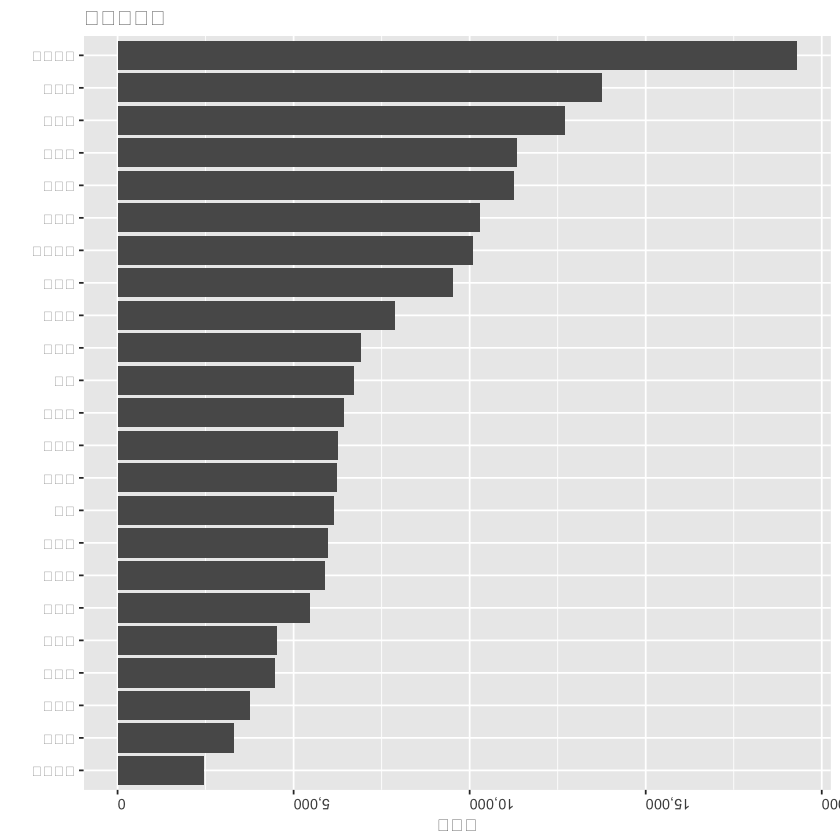

In [16]:
df1 <- df %>%
  select(ward) %>%
  group_by(ward) %>%
  tally() %>%
  arrange((n))

df1$ward <- as.character(df1$ward)
df1$ward <- factor(df1$ward, levels=unique(df1$ward))

df1$pop <- c(58.6,211.3,191.7,143.0,210.3,261.7,219.9,244.0,271.5,280.6,
             341.3,452.8,501.5,378.1,321.7,334.2,686.4,678.6,712.1,550.8,
             719.1,553.3,883.3)

ggplot(df1,aes(ward,n)) +
  geom_bar(stat="identity")+
  ggtitle("区別物件数")+xlab("")+ylab("物件数")+ 
  theme(axis.text.x = element_text(angle = 180, hjust =1))+
  coord_flip() +
  ylim(0,25000) + scale_y_continuous(labels = scales::comma)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


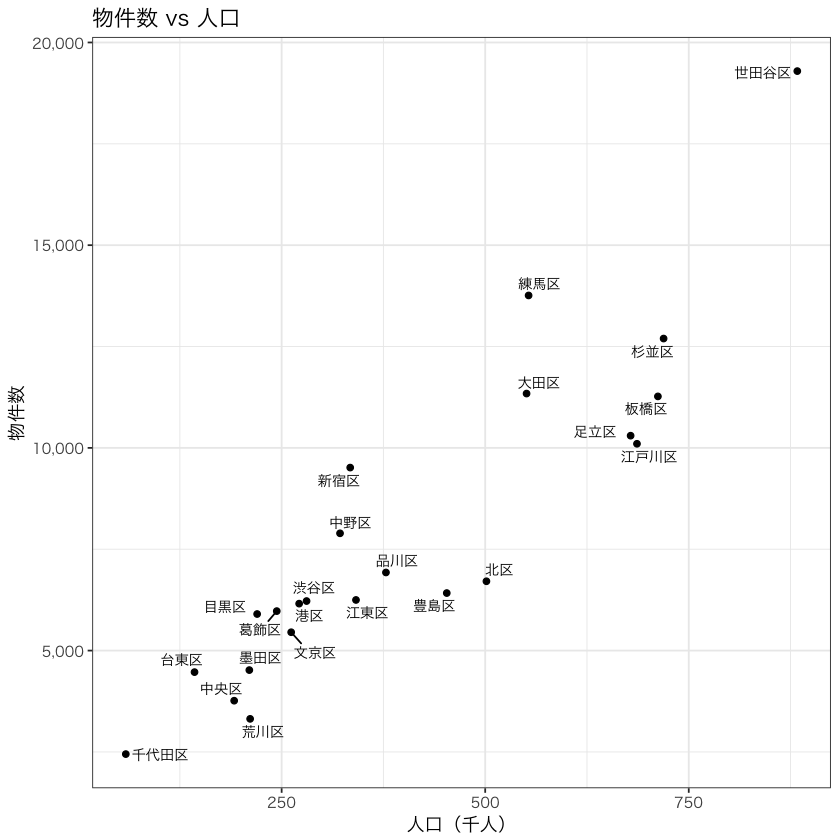

In [17]:
options(warn=-1)

ggplot(df1,aes(pop,n)) +
  geom_point()+
  ggtitle("物件数 vs 人口")+xlab("人口（千人）")+ylab("物件数")+ 
  geom_text_repel(label = df1$ward, family = "HiraKakuProN-W3", size = 3) +
  theme_bw(base_family = "HiraKakuProN-W3") +
  ylim(0,25000) + scale_y_continuous(labels = scales::comma)

In [13]:
cor(df1$n, df1$pop)

[1] 0.8973022

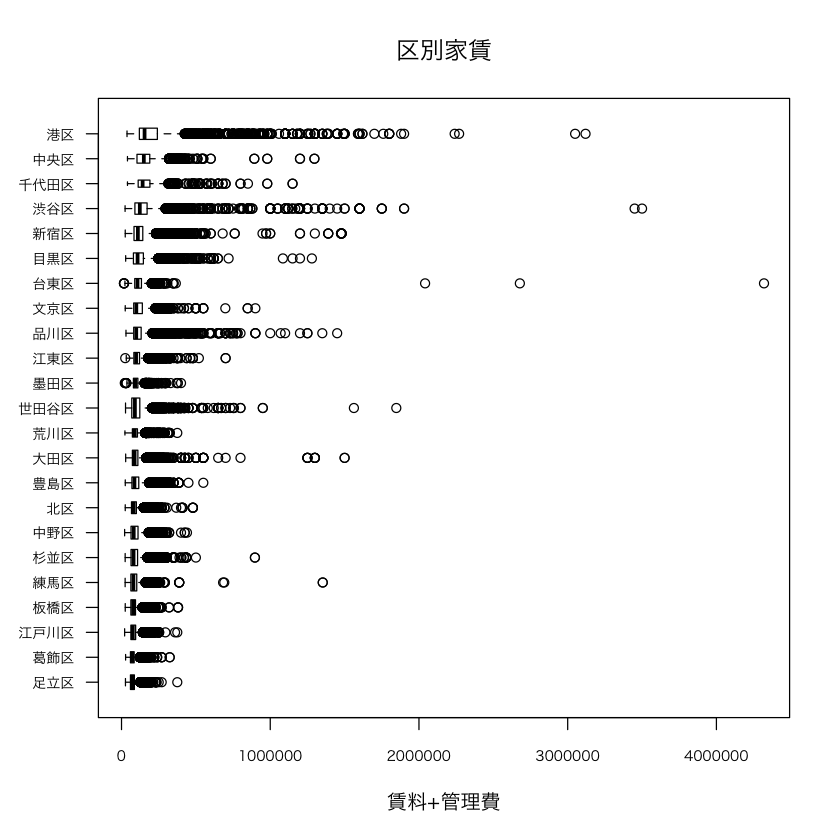

In [18]:
byrentmedian <- with(df, reorder(ward, rent_adm, median))
par(las=1, cex.axis=0.7, family = "HiraKakuProN-W3")
boxplot(rent_adm ~ byrentmedian, data = df,
          xlab = "賃料+管理費", ylab = "",
          main = "区別家賃", varwidth = TRUE, horizontal=TRUE)

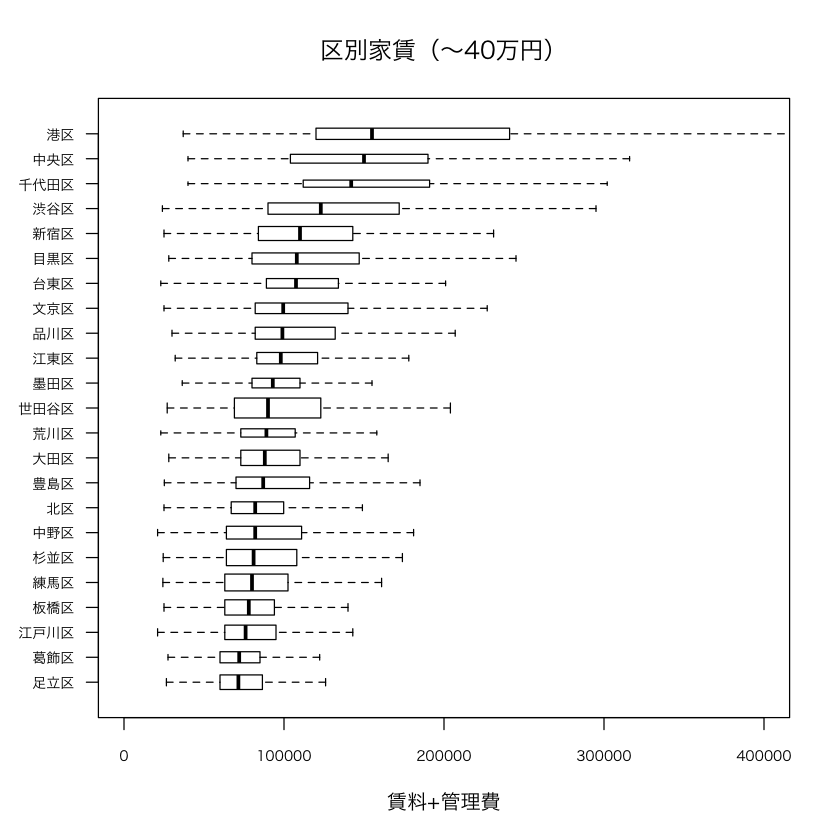

In [19]:
par(las=1, cex.axis=0.7, family = "HiraKakuProN-W3")
boxplot(rent_adm ~ byrentmedian, data = df,
          xlab = "賃料+管理費", ylab = "",
          main = "区別家賃（〜40万円）", varwidth = TRUE, horizontal=TRUE, ylim = c(0,400000), outline=FALSE)

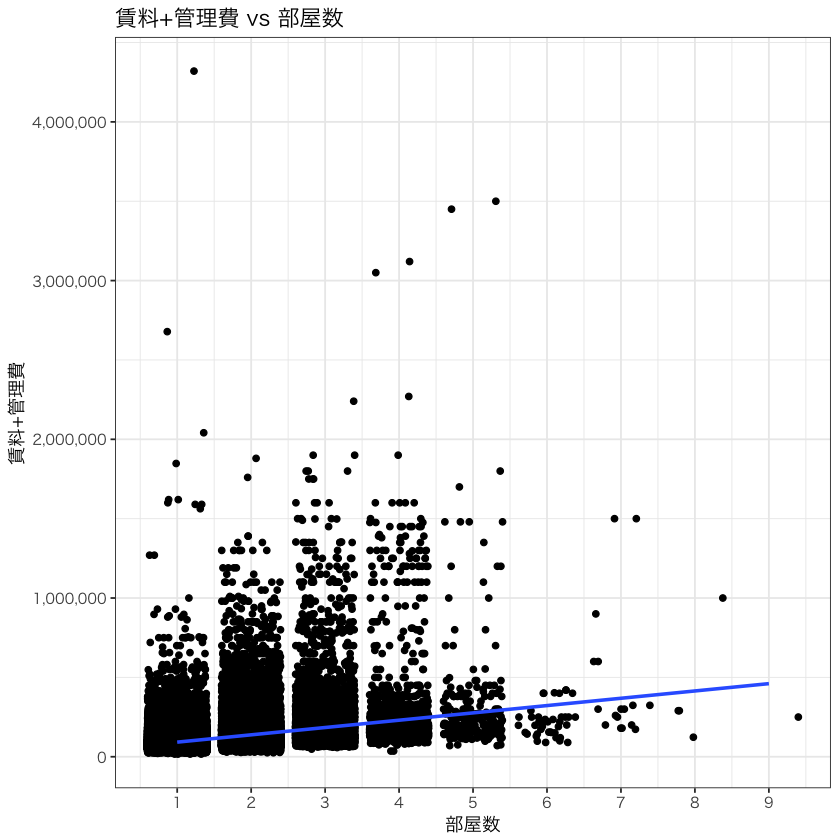

In [20]:
ggplot(df,aes(rooms, rent_adm)) + geom_jitter() +ggtitle("賃料+管理費 vs 部屋数")+xlab("部屋数")+ylab("賃料+管理費")+ theme(axis.text.x = element_text(angle = 180, hjust =1))+theme_bw(base_family = "HiraKakuProN-W3") + geom_smooth(method="lm")  + scale_x_continuous(breaks=seq(0,10,1)) + scale_y_continuous(labels = scales::comma)

In [21]:
#エラーデータ削除
df <- subset(df, rooms <=9)
subset(df, rooms >= 9)

,index,name,address,ward,city,rooms,DK,K,L,S,⋯,distance2,route3,station3,distance3,rent,administration,deposit,gratuity,security,non_refund_depreciation
683,682,江北三丁目戸建住宅,東京都足立区江北３,足立区,江北３,9,1,1,1,0,⋯,NA,,,NA,250000,0,250000,250000,0,0


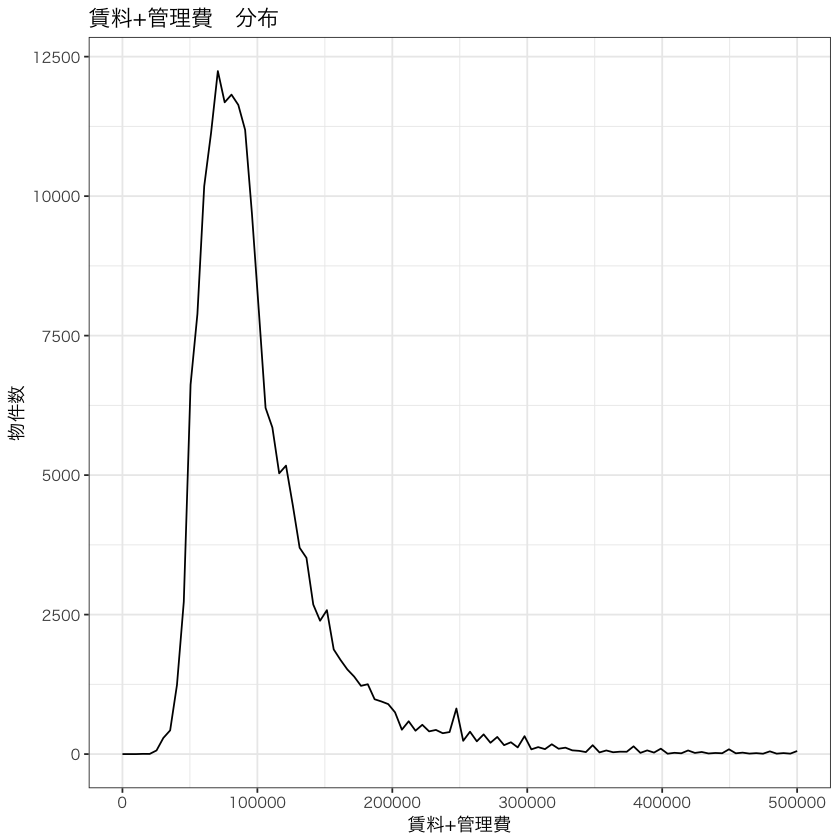

In [22]:
ggplot(df,aes(rent_adm)) + geom_freqpoly(bins = 100) +ggtitle("賃料+管理費　分布")+xlab("賃料+管理費")+ylab("物件数")+ theme(axis.text.x = element_text(angle = 180, hjust =1))+theme_bw(base_family = "HiraKakuProN-W3") + xlim(0,500000)

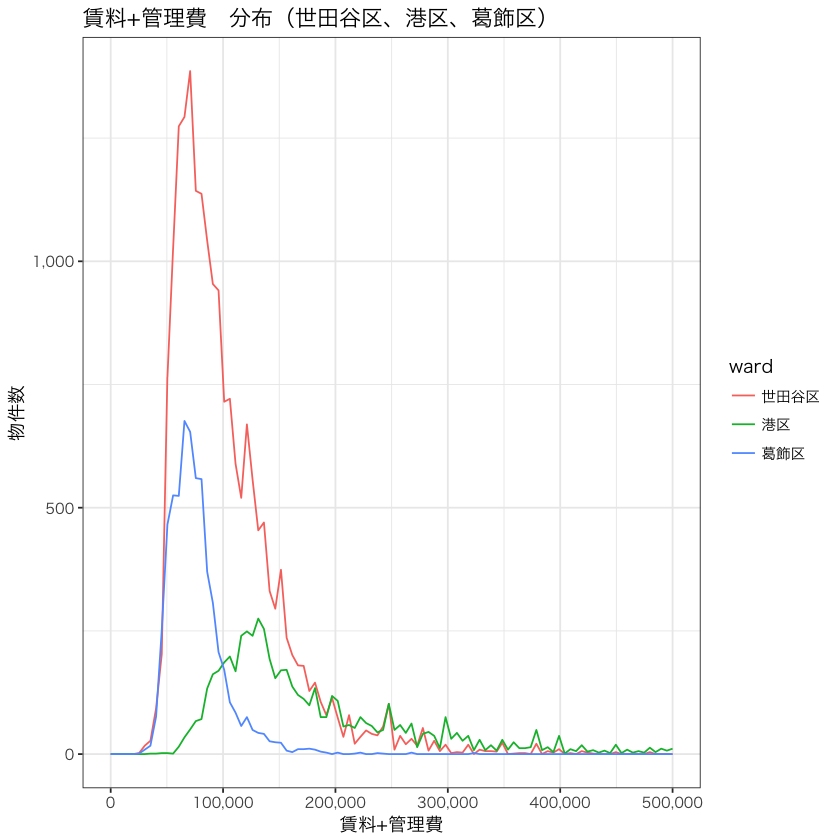

In [24]:
df_sub <- subset(df, ward=="港区" | ward=="世田谷区" | ward=="葛飾区")
ggplot(df_sub,aes(rent_adm, color = ward)) + geom_freqpoly(bins = 100) +ggtitle("賃料+管理費　分布（世田谷区、港区、葛飾区）")+xlab("賃料+管理費")+ylab("物件数")+ theme(axis.text.x = element_text(angle = 180, hjust =1))+theme_bw(base_family = "HiraKakuProN-W3") + scale_x_continuous(labels = scales::comma, limits=c(0, 500000)) + scale_y_continuous(labels = scales::comma)

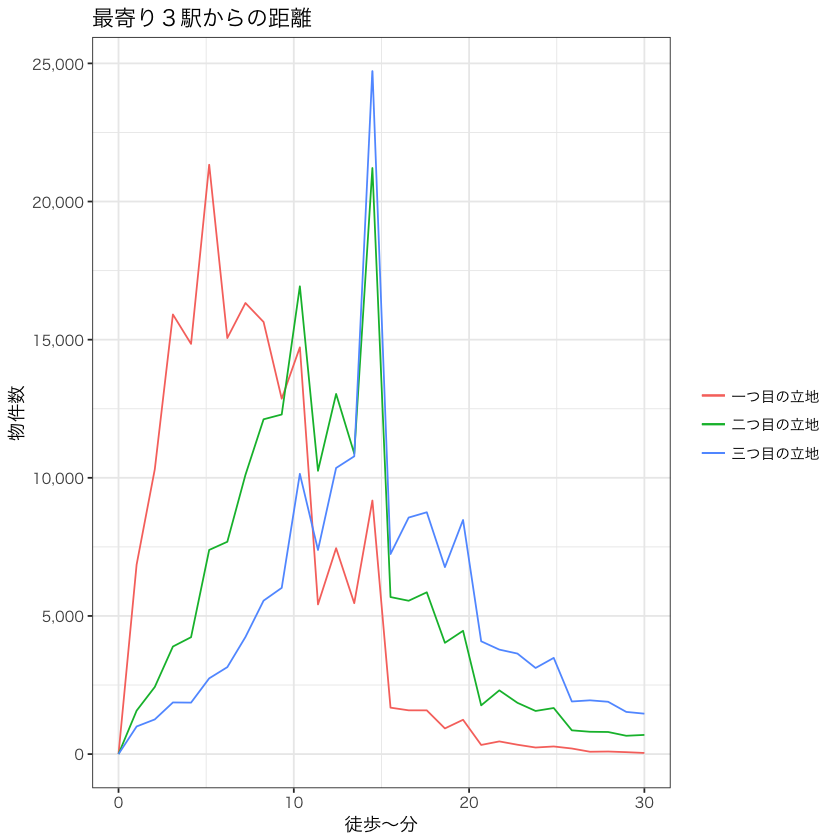

In [25]:
ggplot(df) +
  geom_freqpoly(aes(distance1, color="blue"),bins = 30)+
  geom_freqpoly(aes(distance2, color="green"),bins = 30)+
  geom_freqpoly(aes(distance3, color="red"),bins = 30)+
  ggtitle("最寄り３駅からの距離")+xlab("徒歩〜分")+ylab("物件数")+ 
  theme_bw(base_family = "HiraKakuProN-W3")+
  xlim(0,30) +scale_y_continuous(labels = scales::comma) +
  scale_color_hue(name = "", labels = c("一つ目の立地", "二つ目の立地","三つ目の立地"))

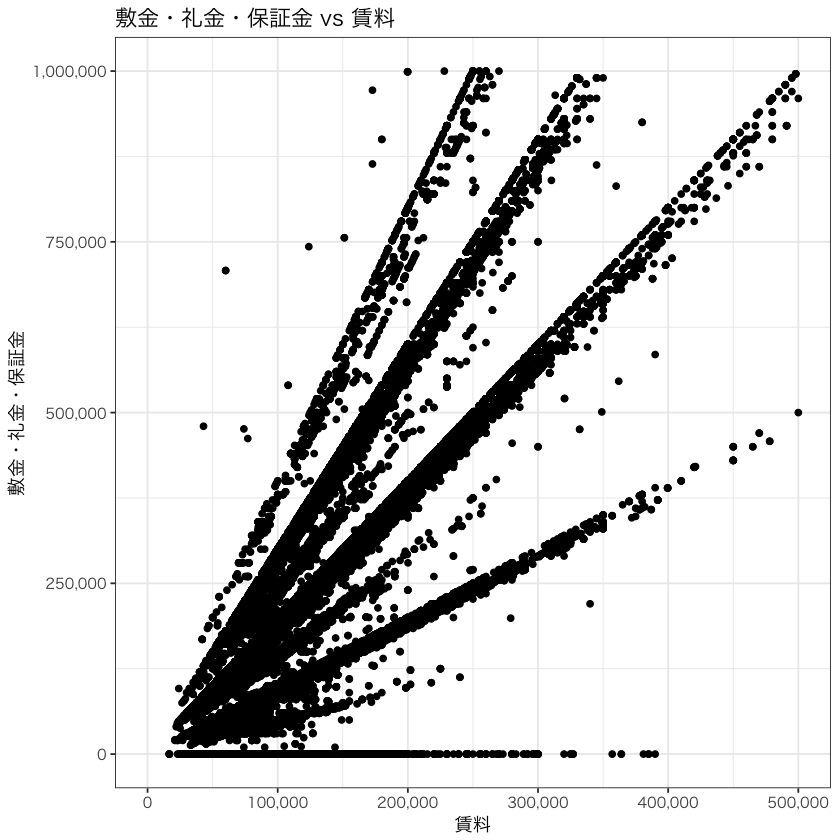

In [26]:
ggplot(df,aes(x=rent_adm,y=initial_cost)) +
  geom_point()+
  ggtitle("敷金・礼金・保証金 vs 賃料")+xlab("賃料")+ylab("敷金・礼金・保証金")+
  theme_bw(base_family = "HiraKakuProN-W3") +scale_y_continuous(labels = scales::comma, limits = c(0,1000000))+
  scale_x_continuous(labels = scales::comma, limits = c(0,500000))

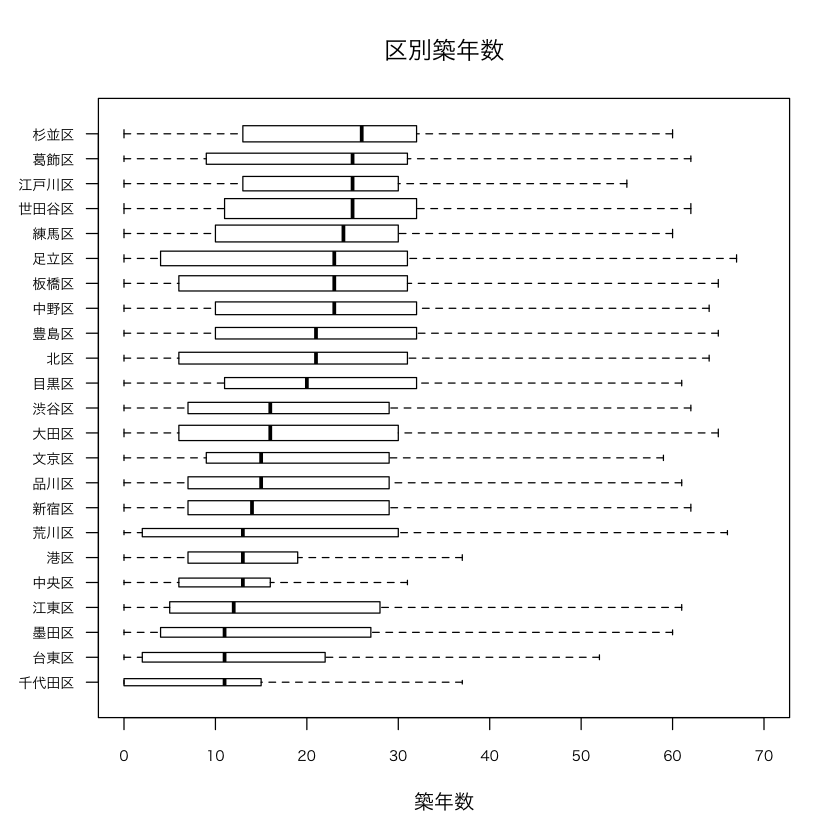

In [27]:
byagemedian <- with(df, reorder(ward, age, median))
par(las=1, cex.axis=0.7, family = "HiraKakuProN-W3")
boxplot(age ~ byagemedian, data = df,
          xlab = "築年数", ylab = "",
          main = "区別築年数", varwidth = TRUE, horizontal=TRUE, ylim = c(0,70), outline=FALSE)

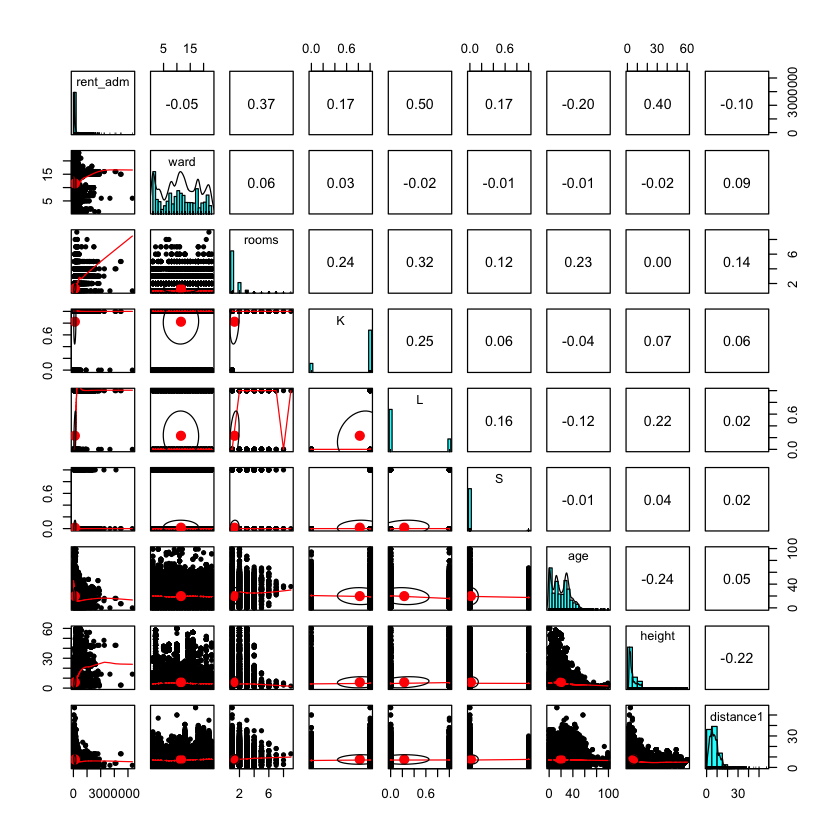

In [28]:
df12 <- df %>%
  select(rent_adm, ward, rooms, K, L, S, age, height, distance1)
pairs.panels(df12)

In [29]:
threshold <- 200000
df_main <- subset(df, rent <= threshold)

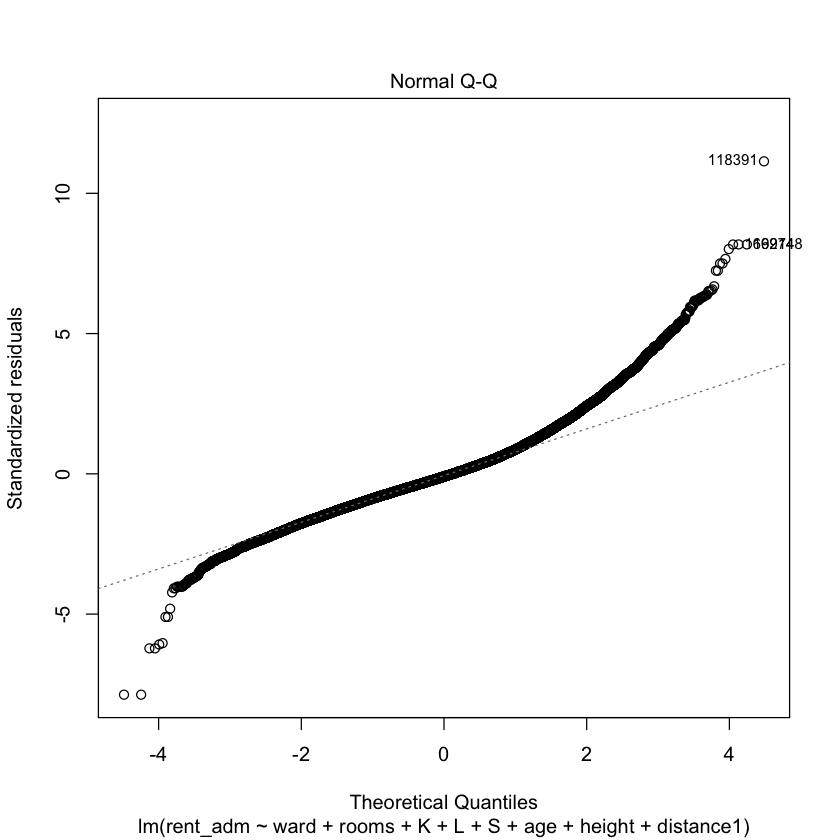

In [30]:
set.seed(1234)
id_train <- sample(1:nrow(df_main), nrow(df_main)/5*4)
train <- df_main[id_train,]
test <- df_main[-id_train,]

lm_rent <- lm(rent_adm ~ ward + rooms + K + L + S + age + height + distance1, data = train)

plot(lm_rent, which=2)